# Import Libraries

In [28]:
import torchaudio
import torchaudio.transforms as transforms
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import os
import pandas as pd
import matplotlib.pyplot as plt

# Extract MFCC


In [64]:
# 1. Extract MFCC Features for Speaker Voice
def extract_mfcc(audio_path):
    waveform, sample_rate = torchaudio.load(audio_path)
    if waveform.shape[0] > 1:
        waveform = waveform.mean(dim=0, keepdim=True)
    mfcc_transform = transforms.MFCC(sample_rate=sample_rate, n_mfcc=40)
    mfcc = mfcc_transform(waveform)
    return mfcc.mean(dim=2).squeeze().numpy() # Calculating mean across the third dimension, which corresponds to the time frames(i.e the temporal dimension)
                                              # This step gives us a "mean" MFCC vector for each coefficient across all time frames, essentially giving us an average
                                              # representation of the MFCC for the entire audio clip.

## Test

In [42]:
emb = extract_mfcc("/content/Train/indira_audio_1.mp3")

/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [40]:
def plot_mfcc_mean(embedding):
    # embeddings is the array of MFCC means, labels could be filenames or speaker names
    plt.bar(np.arange(len(embedding)), embedding, alpha=0.7)
    plt.title('Mean MFCC for Each Audio File')
    plt.xlabel('MFCC Coefficient')
    plt.ylabel('Mean MFCC Value')
    plt.legend()
    plt.show()

<ipython-input-40-880cdaf46d56>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


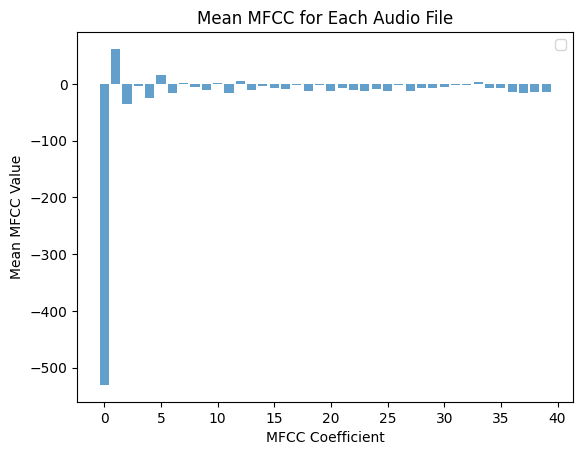

In [43]:
plot_mfcc_mean(emb)

<ipython-input-40-880cdaf46d56>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


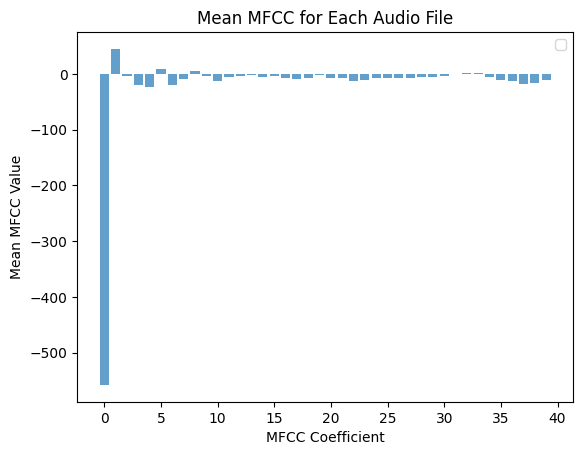

In [44]:
plot_mfcc_mean(extract_mfcc("/content/Train/ankit1.m4a"))

<ipython-input-40-880cdaf46d56>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


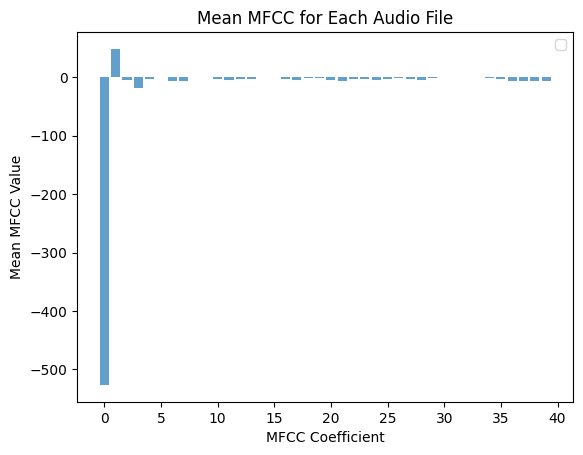

In [45]:
plot_mfcc_mean(extract_mfcc("/content/Train/lotus1.m4a"))

# Prepare Dataset

In [46]:
# 2. Prepare Dataset and Extract Features
def prepare_dataset(audio_folder):
    embeddings = []
    filenames = []
    for audio_file in os.listdir(audio_folder):
        if audio_file.endswith(".m4a") or audio_file.endswith(".mp3") :
            print(os.path.join(audio_folder, audio_file))
            feature = extract_mfcc(os.path.join(audio_folder, audio_file))
            embeddings.append(feature)
            filenames.append(audio_file)
    return np.array(embeddings), filenames

In [47]:
# Extract and Process Train Data
train_embeddings, train_filenames = prepare_dataset("/content/Train")

/content/Train/ameer1.m4a
/content/Train/indira_audio_1.mp3
/content/Train/sumit_sample1.m4a
/content/Train/ankit1.m4a
/content/Train/lotus1.m4a
/content/Train/Bikram1.m4a
/content/Train/anup_1.m4a
/content/Train/Salma_audio_1.m4a


In [49]:
df = pd.DataFrame(train_embeddings)

In [52]:
df["label"] = train_filenames

In [53]:
df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,-422.105927,52.517467,-27.770832,-15.080662,-3.789235,-11.345797,-4.818136,-3.326035,-0.144691,0.737893,...,2.623215,2.689439,0.856491,-0.952987,-3.712323,-7.112546,-8.770921,-8.426980,-6.923652,ameer1.m4a
1,-530.543640,61.739223,-35.868694,-4.096519,-25.465906,15.423242,-15.447595,1.250968,-4.735608,-10.273636,...,-1.412132,-1.897594,3.053924,-7.391067,-7.939744,-14.561485,-15.504099,-14.470678,-14.004122,indira_audio_1.mp3
2,-451.882172,55.291813,0.157637,-11.992610,-9.776352,3.956661,-14.102165,-7.278656,-6.379678,-3.953693,...,-4.082214,1.122297,0.835323,-3.434572,-7.808871,-9.025693,-13.394940,-11.506774,-9.623132,sumit_sample1.m4a
3,-557.847107,44.596935,-4.592840,-20.504786,-24.332848,8.534576,-19.645182,-8.771344,4.141012,-3.702595,...,-0.593188,1.769102,1.690263,-5.566824,-10.262946,-12.394288,-18.417336,-16.847647,-11.529961,ankit1.m4a
4,-526.503052,48.234962,-5.453525,-18.449617,-4.053649,-0.440721,-7.270873,-6.822951,-0.634818,-0.179587,...,0.515346,0.105397,0.381579,-0.807213,-3.871406,-6.449879,-7.454396,-7.276105,-5.989265,lotus1.m4a
5,-641.174011,65.029243,-28.164665,-8.830359,-1.784433,-15.040778,-2.470707,-6.224922,-11.673531,-1.590221,...,0.063216,1.709606,1.169334,-1.825843,-6.130426,-10.406393,-12.076486,-10.096276,-7.719348,Bikram1.m4a
6,-560.019348,45.895592,-13.068480,-26.276611,-1.844299,3.672094,-11.465148,-4.559692,-0.525403,-4.725310,...,-0.382723,-0.772753,-0.371208,-4.753329,-7.354745,-11.521510,-13.471007,-13.121355,-9.281843,anup_1.m4a
7,-587.582275,-23.392673,-7.831439,0.498882,-19.089571,1.453269,-5.560440,-4.741070,-8.803483,2.909453,...,-5.598127,-8.877998,-1.832492,-5.185446,-4.213154,-6.078536,-5.379282,-6.879005,-0.918252,Salma_audio_1.m4a


# Apply PCA for Dimensionality Reduction

In [55]:
def apply_pca(embeddings, n_components=8):
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)
    return reduced_embeddings, pca

In [56]:
train_embeddings, pca_model = apply_pca(train_embeddings)

In [57]:
df = pd.DataFrame(train_embeddings)

In [58]:
df["label"] = train_filenames

In [60]:
df

,0,1,2,3,4,5,6,7,label
0,113.075691,-1.964847,-19.244457,-13.953990,-9.579440,-3.709922,0.310575,0.000002,ameer1.m4a
1,6.004738,25.316845,28.601292,-23.040466,1.855442,3.890737,-1.406488,0.000002,indira_audio_1.mp3
2,83.556366,-2.842344,4.724890,12.419080,15.774211,-2.104982,4.361829,0.000002,sumit_sample1.m4a
3,-22.377779,3.521035,20.139521,17.385534,-8.620839,-8.576021,-3.353922,0.000002,ankit1.m4a
4,9.537074,1.588730,-12.669787,11.102143,2.351444,7.401406,-10.080637,0.000002,lotus1.m4a
5,-103.340424,36.131184,-21.166500,-6.421104,5.510172,-4.742720,1.325505,0.000002,Bikram1.m4a
6,-24.382374,7.216981,-0.801239,12.041411,-9.139300,8.122818,8.380143,0.000002,anup_1.m4a
7,-62.073639,-68.967621,0.416253,-9.532584,1.848301,-0.281318,0.462983,0.000002,Salma_audio_1.m4a


# Function to calculate Similarity (Cosine Similarity)

In [61]:

def compare_embeddings(train_embeddings, test_embeddings, train_filenames):
    similarities = cosine_similarity(test_embeddings, train_embeddings)
    results = []
    for idx, test in enumerate(similarities):
        best_match_idx = np.argmax(test)
        results.append(train_filenames[best_match_idx])
    return results

# Prepare Test Data

In [62]:
# For Test DATA
test_embeddings, test_filenames = prepare_dataset("/content/Test")
test_embeddings = pca_model.transform(test_embeddings)

/content/Test/ankit2.m4a
/content/Test/Salma_audio_2.m4a
/content/Test/ameer2.m4a
/content/Test/indira_audio_2.mp3
/content/Test/lotus2.m4a
/content/Test/sumit_sample2.m4a
/content/Test/anup_2.m4a
/content/Test/Bikram2.m4a


/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


# Compute Similarity and get results

In [63]:
predicted_labels = compare_embeddings(train_embeddings, test_embeddings, train_filenames)
for test_file, prediction in zip(test_filenames, predicted_labels):
    print(f"{test_file} -> Most Similar Speaker: {prediction}")

ankit2.m4a -> Most Similar Speaker: ankit1.m4a
Salma_audio_2.m4a -> Most Similar Speaker: Salma_audio_1.m4a
ameer2.m4a -> Most Similar Speaker: ameer1.m4a
indira_audio_2.mp3 -> Most Similar Speaker: indira_audio_1.mp3
lotus2.m4a -> Most Similar Speaker: lotus1.m4a
sumit_sample2.m4a -> Most Similar Speaker: sumit_sample1.m4a
anup_2.m4a -> Most Similar Speaker: anup_1.m4a
Bikram2.m4a -> Most Similar Speaker: Bikram1.m4a
